<a href="https://colab.research.google.com/github/adapateja/SAR/blob/main/sih2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:


#training

from google.colab import drive
drive.mount('/content/drive')

import numpy as np # linear algebra


from IPython.display import display, Image
from matplotlib.pyplot import imshow
from keras.layers import Conv2D, UpSampling2D, InputLayer
from keras.models import Sequential
from tensorflow.keras.utils import img_to_array, load_img
from skimage.color import lab2rgb, rgb2lab
from skimage import color
import keras as keras
import tensorflow as tf
from tensorflow.keras.layers import Reshape, Lambda, Conv2DTranspose
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
import glob
import cv2 as cv2
import os
import pdb
folder_path='/content/drive/MyDrive/Image_Colorization/Black_White/'
images1 = []
for img in os.listdir(folder_path):
    #print(folder_path+img)
    img=folder_path+img
    img = load_img(img, target_size=(100,100))
    img = img_to_array(img)/ 255
    X= color.rgb2gray(img)
    images1.append(X)
#pdb.set_trace()

folder_path='/content/drive/MyDrive/Image_Colorization/colored/'
images2 = []
for img in os.listdir(folder_path):
    #print(folder_path+img)
    img=folder_path+img
    img = load_img(img, target_size=(100,100))
    img = img_to_array(img)/ 255
    lab_image = rgb2lab(img)
    lab_image_norm = (lab_image + [0, 128, 128]) / [100, 255, 255]
    # The input will be the black and white layer
    Y = lab_image_norm[:,:,1:]

    images2.append(Y)
#pdb.set_trace()


X = np.array(images1)
Y = np.array(images2)
#pdb.set_trace()

x1 = keras.Input(shape=(None, None, 1))

x2 = Conv2D(8, (3, 3), activation='relu', padding='same', strides=2)(x1)
x3 = Conv2D(16, (3, 3), activation='relu', padding='same')(x2)
x4 = Conv2D(16, (3, 3), activation='relu', padding='same', strides=2)(x3)
x5 = Conv2D(32, (3, 3), activation='relu', padding='same')(x4)
x6 = Conv2D(32, (3, 3), activation='relu', padding='same', strides=2)(x5)

# Upsample back to the original size (but results in 104x104 initially)
x7 = UpSampling2D((2, 2))(x6)
x8 = Conv2D(32, (3, 3), activation='relu', padding='same')(x7)
x9 = UpSampling2D((2, 2))(x8)
x10 = Conv2D(16, (3, 3), activation='relu', padding='same')(x9)
x11 = UpSampling2D((2, 2))(x10)

# Output layer that predicts 2 color channels (AB channels)
x12 = Conv2D(2, (3, 3), activation='sigmoid', padding='same')(x11)

# Resize the output to match the ground truth (100x100)
x12 = Lambda(lambda x: tf.image.resize(x, (100, 100)))(x12)

# Finish model
model = keras.Model(x1, x12)

model.compile(optimizer='rmsprop', loss='mse')
model.fit(X, Y, batch_size=1, epochs=400, verbose=1)

# Evaluate the model
model.evaluate(X, Y, batch_size=1)
#pdb.set_trace()



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Epoch 1/400
640/640 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 0.0021
Epoch 2/400
640/640 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 0.0022
Epoch 3/400
640/640 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0022
Epoch 4/400
640/640 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0021
Epoch 5/400
640/640 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0021
Epoch 6/400
640/640 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0020
Epoch 7/400
640/640 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0020
Epoch 8/400
640/640 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0020
Epoch 9/400
640/640 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0022
Epoch 10/400
640/640 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0021
Epoch 11/400
640/640 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0022
Epoch 12/400
640/640 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0022
Epoch 13/400
640/640 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/ste

0.0015843963483348489

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 703ms/step


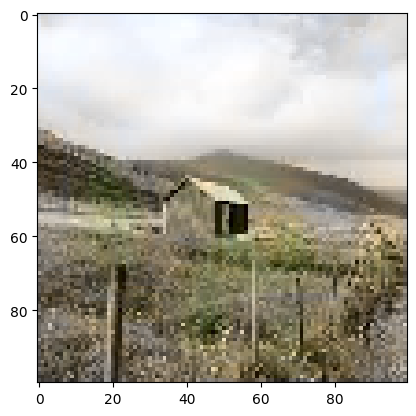

In [ ]:
folder_path='/content/drive/MyDrive/Image_Colorization/Test/'
img='Gray_rural31.jpeg'
img=folder_path+img

img = load_img(img, target_size=(100,100),color_mode = "grayscale")
img = img_to_array(img)/ 255
ss=img.shape

#
X = np.array(img)
X = np.expand_dims(X, axis=2)
X=np.reshape(X,(1,100,100,1))

output = model.predict(X)
output=np.reshape(output,(100,100,2))
output=cv2.resize(output,(ss[1],ss[0]))
AB_img = output
outputLAB = np.zeros((ss[0],ss[1], 3))
img=np.reshape(img,(100,100))
outputLAB[:,:,0]=img
outputLAB[:,:,1:]=AB_img
outputLAB = (outputLAB * [100, 255, 255]) - [0, 128, 128]
rgb_image = lab2rgb(outputLAB)

import matplotlib.pyplot as plt
#output=output+edges
imshow(rgb_image)
plt.show()